In [2]:
import warnings

warnings.filterwarnings('ignore', message= 'Series.__getitem__')
warnings.filterwarnings('ignore', category = DeprecationWarning)
import numpy as np
import pandas as pd
no_deprecation_warning=True
df = pd.read_csv('dataset_topics_60k.csv')
df.dtypes

Unnamed: 0            int64
0                    object
1                    object
2                    object
source               object
hash                 object
topic1              float64
topic2              float64
topic3              float64
topic4              float64
topic5              float64
topic6              float64
topic7              float64
topic8              float64
topic9              float64
topic10             float64
topic11             float64
topic12             float64
topic13             float64
topic14             float64
topic15             float64
best topic           object
best probability    float64
dtype: object

In [3]:
!nvidia-smi

Wed Dec 13 18:06:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   43C    P8              10W /  95W |    151MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
df.head()

,Unnamed: 0,0,1,2,source,hash,topic1,topic2,topic3,topic4,...,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,best topic,best probability
0,24,visiting the graves,stronger the october wind,at my grandparents',tempslibres,VISITINGTHEGRAVESSTRONGERTHEOCTOBERWINDATMYGRA...,0.011111,0.011111,0.011111,0.011111,...,0.011111,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,topic12,0.844444
1,141,profound blue of night,the resin and salt of pines,so far from the sea,tempslibres,PROFOUNDBLUEOFNIGHTTHERESINANDSALTOFPINESSOFAR...,0.007407,0.896296,0.007407,0.007407,...,0.007407,0.007407,0.007407,0.007407,0.007407,0.007407,0.007407,0.007407,topic2,0.896296
2,142,scattered in the ditch,like tiny scraps of blue sky,bits of plastic bag,tempslibres,SCATTEREDINTHEDITCHLIKETINYSCRAPSOFBLUESKYBITS...,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.906666,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,topic9,0.906666
3,343,the smell of her hands,on the neck of the bottle,drinking greedily,tempslibres,THESMELLOFHERHANDSONTHENECKOFTHEBOTTLEDRINKING...,0.011111,0.011111,0.011111,0.011111,...,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,topic8,0.844444
4,435,christmas services,a cellular phone rings out,handel's messiah,tempslibres,CHRISTMASSERVICESACELLULARPHONERINGSOUTHANDELS...,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.139525,0.008333,0.008333,0.512645,0.247830,topic14,0.512645


In [5]:
# Function to create a string instance based on specific columns in a DataFrame
def combine_columns_to_string(index):
    # Ensuring the index is non-negative
    assert index >= 0, 'Index cannot be a negative integer'

    # Retrieving the row at the specified index
    selected_row = df.iloc[index, :]

    # Combining columns 0, 1, and 2 into a single string
    # making the poem seem together at similar manner
    combined_string = str(selected_row[21])+' = '+str(selected_row[1]) +'. / ' +str(selected_row[2]) + '. / '+str(selected_row[3])

    return combined_string

# Applying the function to each row in the df
document = [combine_columns_to_string(i) for i in range(len(df.iloc[:, 2]))]
print(len(document))
document[:10]

26327


["topic12 = visiting the graves. / stronger the october wind. / at my grandparents'",
 'topic2 = profound blue of night . / the resin and salt of pines. / so far from the sea',
 'topic9 = scattered in the ditch . / like tiny scraps of blue sky. / bits of plastic bag',
 'topic8 = the smell of her hands. / on the neck of the bottle. / drinking greedily',
 "topic14 = christmas services. / a cellular phone rings out. / handel's messiah",
 "topic4 = gazing at the moon. / on a still summer's evening. / feast for mosquitoes",
 'topic8 = my tea gets colder. / and the madeleine just sinks. / memory betrays',
 'topic14 = small green waves crashing. / against a porcelain rim. / morning tea tempest',
 'topic1 = red poppies growing. / between rows of white tombstones. / as in remembrance',
 'topic9 = in front of bronze doors. / they huddle against the cold. / the newly homeless']

In [6]:
#cleaning the document
document = [string.replace('\'', '') for string in document]
document[:5]

['topic12 = visiting the graves. / stronger the october wind. / at my grandparents',
 'topic2 = profound blue of night . / the resin and salt of pines. / so far from the sea',
 'topic9 = scattered in the ditch . / like tiny scraps of blue sky. / bits of plastic bag',
 'topic8 = the smell of her hands. / on the neck of the bottle. / drinking greedily',
 'topic14 = christmas services. / a cellular phone rings out. / handels messiah']

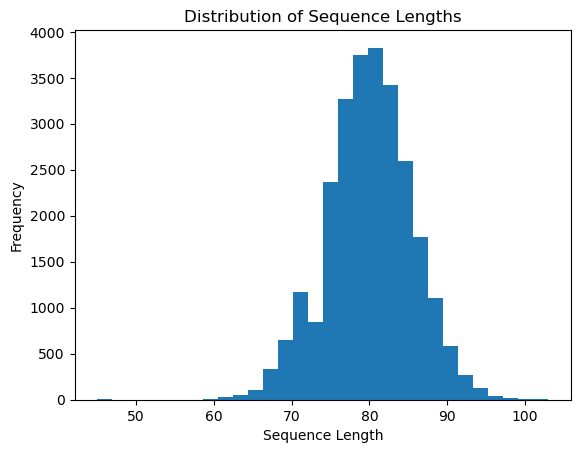

In [7]:
import matplotlib.pyplot as plt

# For sequence lengths, assuming 'text' column contains sequences
sequence_lengths = [len(seq) for seq in document]
plt.hist(sequence_lengths, bins=30)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [8]:
import random
import os

# time related modules
import time
import datetime
import torch

from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, random_split, DataLoader, RandomSampler, SequentialSampler


In [9]:
RAND_SEED = 73
BATCH_SIZE = 2
EPOCHS = 1

In [12]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
special_tokens_dict = {
    'bos_token': '<BOS>',
    'eos_token': '<EOS>',
    'pad_token': '<PAD>'}
num_added_tokens = tokenizer.add_special_tokens(special_tokens_dict)

In [13]:
max_length= max([tokenizer(d, return_tensors="pt").input_ids.cuda().shape[1] for d in document])
print(max_length)

30


In [14]:
class PoemDataset(Dataset):
    def __init__(self, data, tokenizer, gpt2_type='gpt2', max_length=max_length):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.attn_masks = []
        all_texts = ""
        # Iterate over data, tokenize each sequence and append its input_id and attention_mask to respective lists
        for i in data:
            all_texts+=i
            encodings_dict = tokenizer(all_texts,
                                     truncation=True,
                                     max_length=max_length,
                                     padding='max_length')

            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
            all_texts = ""

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [15]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<BOS>', 'eos_token': '<EOS>', 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<PAD>'}, clean_up_tokenization_spaces=True)

In [16]:
# with torch.no_grad():
#   prompt_tokens2 = tokenizer("Create a haiku about a pug. Write three lines with 5/7/5 syllables.", return_tensors="pt").input_ids.cuda()
#   sample_outputs = gpt.generate(prompt_tokens2, max_length=80, do_sample=True, temperature=0.7)
#   for i, sample_output in enumerate(sample_outputs):
#     print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))


In [17]:
tokenizer('visiting the graves. / stronger the october wind. / at my grandparents', return_tensors="pt").input_ids.cuda().shape

torch.Size([1, 16])

In [18]:
poem_dataset = PoemDataset(document, tokenizer, max_length=max_length)
poem_dataset

In [19]:
len(poem_dataset)

26327

In [21]:
configuration = GPT2Config(vocab_size=len(tokenizer), n_positions=max_length).from_pretrained('gpt2', output_hidden_states=True)
model = GPT2LMHeadModel.from_pretrained('gpt2', config=configuration)
model.resize_token_embeddings(len(tokenizer))
model.cuda()

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 50260. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50260, bias=False)
)

In [62]:
from transformers import TrainerCallback
from transformers import TrainingArguments, Trainer

class SaveCallback(TrainerCallback):
  "A callback that prints a message at the beginning of training"

  def on_step_end(self, args, state, control, **kwargs):
    if state.global_step %5000 == 4999:
      file_name = "checkpoints/output/gpt2_" + str(state.global_step+1).zfill(6) + ".pt"
      torch.save(model, file_name)

In [22]:
split = 0.8
train_size = int(split * len(poem_dataset))

train_dataset, val_dataset = random_split(poem_dataset, [train_size, len(poem_dataset) - train_size])

In [23]:
train_dataset, val_dataset, len(train_dataset), len(val_dataset)

(<torch.utils.data.dataset.Subset at 0x24d4eeefb10>,
 21061,
 5266)

In [24]:
torch.cuda.manual_seed_all(RAND_SEED)
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
torch.manual_seed(RAND_SEED)

In [25]:
poem_train_dataloader = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=BATCH_SIZE)

poem_val_dataloader = DataLoader(val_dataset,
                            sampler=SequentialSampler(val_dataset),
                            batch_size=BATCH_SIZE)

In [26]:
# helper function for logging time
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# hyperparameters
learning_rate = 1e-3
eps = 1e-8
warmup_steps = 50
device = torch.device('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
total_steps = len(poem_train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=warmup_steps,
                                            num_training_steps=total_steps)


# Move the model to the specific device (GPU/CPU).
model = model.to(device)
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50260, bias=False)
)

In [28]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50260, bias=False)
)

In [29]:
len(poem_train_dataloader)

10531

In [30]:
# Initialize an empty list to hold the losses during training
losses = []
valid_losses =[]
start_time = time.time()

for epoch_i in range(0, 3):

    print(f'Epoch {epoch_i + 1} of {EPOCHS}')

    t0 = time.time()

    # Reset the total training loss for this epoch
    total_train_loss = 0

    model.train()

    # Loop over each batch from the training data loader
    for step, batch in enumerate(poem_train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        # Clear out the gradients from the previous training step
        model.zero_grad()

        outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks, token_type_ids=None)

        # Extract the loss from the outputs
        loss = outputs[0]

        # Extract and accumulate the total loss
        batch_loss = loss.item()
        total_train_loss += batch_loss

        loss.backward()

        optimizer.step()

        # Update the learning rate
        scheduler.step()

        losses.append(loss.item())


        if step % 50 == 0:
            print(f"Step: {step}, Loss: {loss.item():.4f}")

#         if step>2000:
#             break

    # avg for this epoch
    avg_train_loss = total_train_loss / len(poem_train_dataloader)


    training_time = format_time(time.time() - t0)


    print(f'Average Training Loss: {avg_train_loss}. Epoch Training Time: {training_time}')

    model.eval()

    # Reset the total validation loss
    total_eval_loss = 0
    nb_eval_steps = 0


    for batch in poem_val_dataloader:
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():

            # Forward pass
            outputs  = model(b_input_ids, attention_mask=b_masks, labels=b_labels)

            loss = outputs[0]


        batch_loss = loss.item()
        total_eval_loss += batch_loss
        valid_losses.append(batch_loss)

    # avg validation loss for this epoch
    avg_val_loss = total_eval_loss / len(poem_val_dataloader)

    print(f'Average Validation Loss: {avg_val_loss}')
    torch.save(model.state_dict(),  'gpt2_model_topicwise.pth')

print(f'Total Training Time: {format_time(time.time()-start_time)}')


Epoch 1 of 1
Step: 0, Loss: 63.9736
Step: 50, Loss: 3.1861
Step: 100, Loss: 4.8343
Step: 150, Loss: 3.5315
Step: 200, Loss: 3.7344
Step: 250, Loss: 2.9859
Step: 300, Loss: 3.1559
Step: 350, Loss: 2.7517
Step: 400, Loss: 2.7633
Step: 450, Loss: 3.5468
Step: 500, Loss: 3.5461
Step: 550, Loss: 3.0253
Step: 600, Loss: 2.5290
Step: 650, Loss: 2.4796
Step: 700, Loss: 3.1939
Step: 750, Loss: 3.2336
Step: 800, Loss: 2.4816
Step: 850, Loss: 2.6426
Step: 900, Loss: 3.1952
Step: 950, Loss: 2.9320
Step: 1000, Loss: 3.1752
Step: 1050, Loss: 2.5203
Step: 1100, Loss: 2.9755
Step: 1150, Loss: 2.7384
Step: 1200, Loss: 2.7358
Step: 1250, Loss: 3.4353
Step: 1300, Loss: 2.3997
Step: 1350, Loss: 3.1603
Step: 1400, Loss: 3.0145
Step: 1450, Loss: 3.1626
Step: 1500, Loss: 2.8860
Step: 1550, Loss: 3.1057
Step: 1600, Loss: 2.8189
Step: 1650, Loss: 2.7347
Step: 1700, Loss: 3.0250
Step: 1750, Loss: 2.5031
Step: 1800, Loss: 2.6852
Step: 1850, Loss: 2.7349
Step: 1900, Loss: 3.0802
Step: 1950, Loss: 2.5202
Step: 200

Step: 5650, Loss: 2.1827
Step: 5700, Loss: 2.1203
Step: 5750, Loss: 1.9197
Step: 5800, Loss: 2.5935
Step: 5850, Loss: 2.2982
Step: 5900, Loss: 2.2727
Step: 5950, Loss: 1.9987
Step: 6000, Loss: 2.9563
Step: 6050, Loss: 2.1979
Step: 6100, Loss: 2.1001
Step: 6150, Loss: 2.5587
Step: 6200, Loss: 2.3302
Step: 6250, Loss: 2.4499
Step: 6300, Loss: 2.2876
Step: 6350, Loss: 2.2175
Step: 6400, Loss: 1.6445
Step: 6450, Loss: 1.6528
Step: 6500, Loss: 1.9932
Step: 6550, Loss: 1.7926
Step: 6600, Loss: 1.6600
Step: 6650, Loss: 1.5973
Step: 6700, Loss: 1.9574
Step: 6750, Loss: 2.4185
Step: 6800, Loss: 3.1500
Step: 6850, Loss: 2.7241
Step: 6900, Loss: 2.1094
Step: 6950, Loss: 2.6807
Step: 7000, Loss: 1.8109
Step: 7050, Loss: 2.8791
Step: 7100, Loss: 2.1509
Step: 7150, Loss: 2.7272
Step: 7200, Loss: 2.1149
Step: 7250, Loss: 2.2828
Step: 7300, Loss: 2.0173
Step: 7350, Loss: 2.4813
Step: 7400, Loss: 2.3788
Step: 7450, Loss: 1.8136
Step: 7500, Loss: 2.1578
Step: 7550, Loss: 2.6793
Step: 7600, Loss: 2.3487


In [31]:
import matplotlib.pyplot as plt

In [32]:
len(losses)

31593

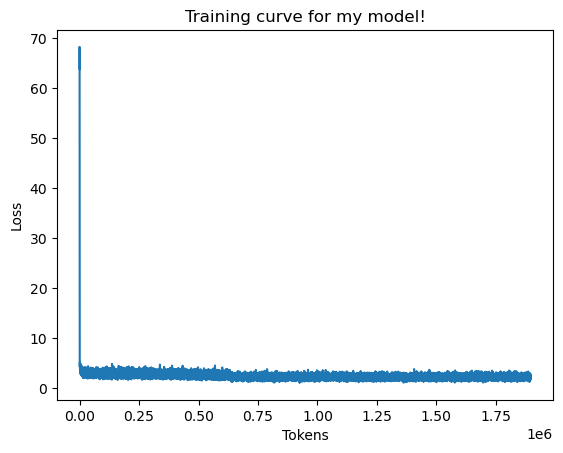

In [33]:
x = np.arange(len(losses)) * (max_length * BATCH_SIZE)

# Plot the line chart
plt.plot(x, losses)
plt.xlabel('Tokens')
plt.ylabel('Loss')
plt.title('Training curve for my model!')
plt.show()

## The loss at the beginning of the epoch is already low because it has been retrained again from previous run.

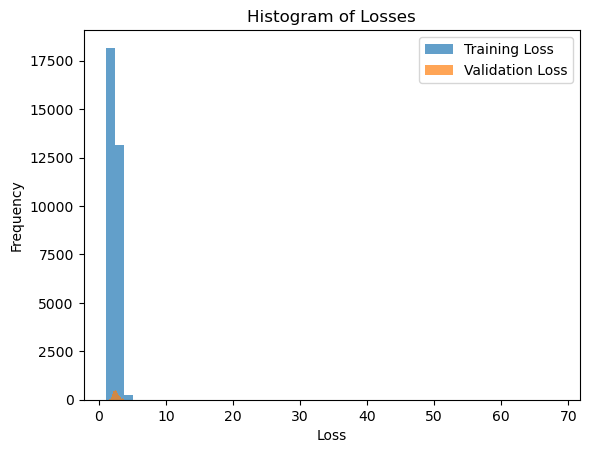

In [34]:
plt.hist(losses, bins=50, alpha=0.7, label='Training Loss')
plt.hist(valid_losses, bins=50, alpha=0.7, label='Validation Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.legend()
plt.show()

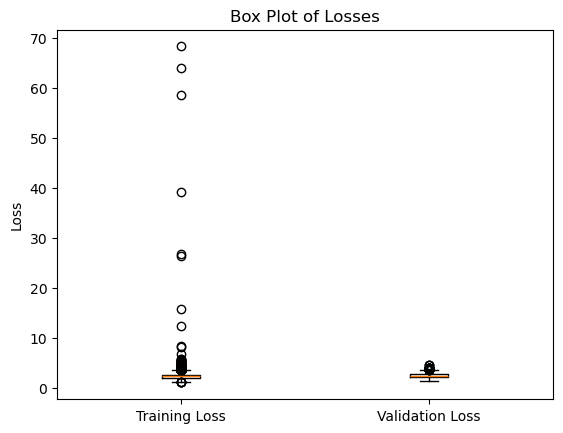

In [35]:
plt.boxplot([losses, valid_losses], labels=['Training Loss', 'Validation Loss'])
plt.ylabel('Loss')
plt.title('Box Plot of Losses')
plt.show()

In [36]:
train_avg_loss = total_train_loss / len(poem_train_dataloader.dataset)
train_perplexity = 2 ** train_avg_loss  # Perplexity formula: 2^average_loss_per_token

val_avg_loss = total_eval_loss / len(poem_val_dataloader.dataset)
val_perplexity = 2 ** val_avg_loss

print(f'Training Perplexity: {train_perplexity}')
print(f'Validation Perplexity: {val_perplexity}')

Training Perplexity: 2.1468870141865035
Validation Perplexity: 2.387623166284294


In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

# create text generation seed promp
prompts = ["<BOS> Blue sky","<BOS> Life and sadness","<BOS> Wild water "]
for prompt in prompts:
    generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
    generated = generated.to(device)

    sample_outputs = model.generate(
                                    generated,
                                    do_sample=True,
                                    top_k=50,
                                    max_length=max_length,
                                    top_p=0.95,
                                    num_return_sequences=3
                                    )

    # print(tokenizer.decode(sample_outputs[0], skip_special_tokens=True))

    for i, sample_output in enumerate(sample_outputs):
        print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

C:\Users\OMEN\anaconda3\envs\fastaging\Lib\site-packages\transformers\generation\utils.py:1411: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Blue sky. / autumn shades of the sky. / gray sky and sea of the sky


1: Blue sky. / blue sky sky and sun in. / autumn and gold clouds of joy


2: Blue sky. / the earth in the sky. / as a golden storm clouds




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Life and sadness. /  the love in each other. / as much as you have


1: Life and sadness. /  magic comes true god comes. / in again i cant


2: Life and sadness. /  happiness were the same. / same before the past it was


0: Wild water ive been drinking. /  in a couple weeks this week. / but im not over


1: Wild water ikanida. /  and then i have to go back. / from the sun when the sun


2: Wild water iced coffee. /  and chicken oil with wine with sweet. / socks and butterbread




In [42]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', 'source', 'hash', 'topic1', 'topic2',
       'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9',
       'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15',
       'best topic', 'best probability'],
      dtype='object')

In [49]:
a = df.columns[6:21].astype(str).to_numpy().tolist()
type(a)
a

['topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic9',
 'topic10',
 'topic11',
 'topic12',
 'topic13',
 'topic14',
 'topic15']

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

# create text generation seed promp
prompts = df.columns[6:21].astype(str).to_numpy().tolist()
for prompt in prompts:
    generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
    generated = generated.to(device)

    sample_outputs = model.generate(
                                    generated,
                                    do_sample=True,
                                    top_k=50,
                                    max_length=max_length,
                                    top_p=0.95,
                                    num_return_sequences=3
                                    )

    # print(tokenizer.decode(sample_outputs[0], skip_special_tokens=True))

    for i, sample_output in enumerate(sample_outputs):
        print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic1 = someone tell me how. /  long. / it is to walk home with my dog


1: topic1 = if only you were. /  the one that werent in theirs. / on this list your phone


2: topic1 = i actually. /  dont think im gonna get out. / of my heart i cant




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic2 = i actually. /  got a headache i just. / want it to go back


1: topic2 = this is a wonderful. /  song today and i hope it. / gets better or better


2: topic2 = youre having fun. /  with some of the best friends and. / all the love has come




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic3 = i gotta give up. /  to you if you cant keep. / that shit up right now


1: topic3 = aaron has been. /  on me since i said the song. / he called the new bro


2: topic3 = this is exactly. /  what the best feeling ive ever. / seen after all that




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic4 = im literally. /  so tired i havent been. / in a long week time


1: topic4 = the problem with the. /  new is that you cant see the. / world in a better


2: topic4 = the only person. /  i have to go to is my. / mama i mean im




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic5 = theres only a single. /  girl there who loves me and. / all of her beautiful


1: topic5 = its very funny. /  when we both know we got so. / much for god i want


2: topic5 = if i ever say. /  i need you i feel like im. / too much for you to




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic6 = im really trying. /  to give myself a hug and. / love my boyfriend


1: topic6 = i really hope you. /  had me in this mood thats what. / i dont have in life


2: topic6 = its amazing. /  in life to be knowing someone. / doesnt give it no




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic7 = is it normal to. /  just feel like my girlfriend i. / am just trying to


1: topic7 = i really want to. /  go back to the year before. / i was in highschool


2: topic7 = im so excited. /  for the gym i hope to get. / up early next year




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic8 = a coyote. /  on a grass of cotton milk. / is sweet im sad bitch


1: topic8 = honestly im in. /  a hot house all the time. / its my birthday gifts


2: topic8 = it feels better to. /  be off or to be there for. / the rest of the day




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic9 = when people say they. /  need me to see people i. / think i would be mad


1: topic9 = i dont even know. /  how much worse i really hate. / him because he is


2: topic9 = i havent seen the. /  moon in a while its starting. / to cut it all down




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic10 = why do i get it. /  up even though its good cause. / it makes no worse sense


1: topic10 = i hate being home. /  at that party but im. / like i hate myself


2: topic10 = people tell me they. /  dont even know i really. / wanna say something




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic11 = someone tell me why. /  my entire life has started. / crying me out to me


1: topic11 = i cant take my. /  ass to work today if im. / sick of having myself


2: topic11 = they are all the time. /  to see the fuck outta me. / like this is the whole thread




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic12 = sometimes i feel like. /  i have to learn how to act. / like i dont remember


1: topic12 = we had a pretty. /  day and i want a day of. / work for the next day


2: topic12 = when you should be writing. /  in your messages to. / your own entire




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic13 = so i am tired. /  at all im just so ready. / to go back to school


1: topic13 = i dont need to pray. /  for anyone but aint. / been a while i need


2: topic13 = you gotta trust someone. /  who loves you and trust you. / or deserve it too




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: topic14 = i honestly dont. /  know how much this is the truth. / this is in the past


1: topic14 = a girl should never. /  be ready to be an. / amazing woman


2: topic14 = this world will be. /  such a sweet mood and i could. / have never meant it


0: topic15 = im thinking about. /  not having a haircut and. / im still saying yes


1: topic15 = a boy can tell you. /  when you give something about. / you like i wasnt


2: topic15 = sometimes the biggest. /  thing you ever get to do. / when you dont want to


